In [1]:
import sys
import os
import datetime

import pandas as pd
import numpy as np

import yfinance as yf
from fredapi import Fred

import matplotlib.pyplot as plt



In [2]:
# custom modules that are present in this Git repo, written by me
import yahoo.code.support_functions as sf
import yahoo.code.plot_functions as pf
# I've refactored the initial version of this notebook into a custom module below
import yahoo.code.dislocation_analysis as da
import yahoo.code.ETL as ETL
import yahoo.code.option_strategy as OptS

In [120]:
import importlib
importlib.reload(OptS)

<module 'yahoo.code.option_strategy' from '/Users/lukelee/Documents/Interview/Learning/yahoo/code/option_strategy.py'>

In [121]:
test = OptS.Straddle(ticker="^DJX", trade_date= datetime.date(2025, 6, 17), quantity=7, target_dtox = 30)

#test.set_strike(strike=400.25)
test.build()


ATM Strike of 420.0 selected 

Ticker: '^DJX', Exp: 2025-07-18, Dtox: 31, Premium:  128.45 
Strike: 420.0, Break even points: [np.float64(401.65), np.float64(438.35)] 
Max Profit:  inf, Max Loss: -128.45 



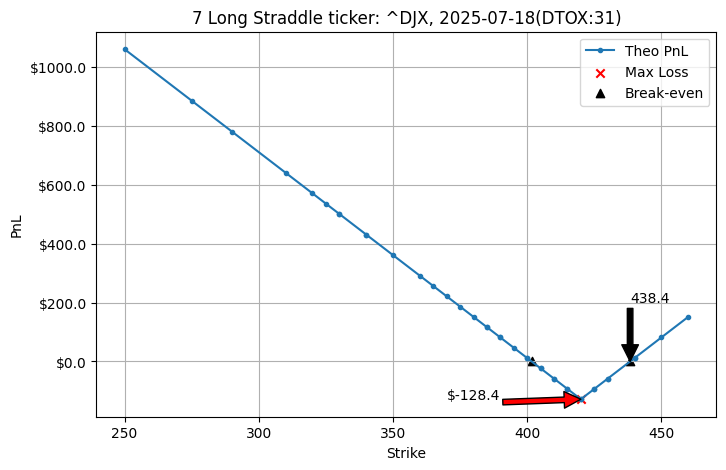

In [122]:
test.plot_theo_pnl()

In [75]:
print(test)

Ticker: '^DJX', Exp: 2025-07-18, Dtox: 31, Premium:  30.07 
Strike: 400, Break even points: [np.float64(369.93), np.float64(430.07)] 
Max Profit:  inf, Max Loss: -30.07 



In [76]:
print(repr(test))

Straddle(ticker='^DJX', trade_date='2025-06-17', quantity=1, target_dtox=30)


## Notes on class

The new class I am about to build needs the following


#### Input

- underlying
- strikes
- long/short
- expiration (target)

#### calculation

- max profit
- break even point(s)
- max loss

#### methods

- plot PnL
- backtest


In [6]:
dji = da.extract_hist_yf("^DJI")

Error in getting ticker information 
 HTTP Error 401: 
                                   Open          High           Low  \
Date                                                                  
2025-06-16 00:00:00-04:00  42300.128906  42707.730469  42300.128906   
2025-06-17 00:00:00-04:00  42358.621094  42530.828125  42132.648438   
2025-06-18 00:00:00-04:00  42236.000000  42510.070312  42118.230469   

                                  Close  
Date                                     
2025-06-16 00:00:00-04:00  42515.089844  
2025-06-17 00:00:00-04:00  42215.800781  
2025-06-18 00:00:00-04:00  42171.660156  


Time Series data from 1992-01-02 to 2025-06-18. Total of 8426 observation


In [7]:
dji.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-06-12 00:00:00-04:00,42737.359375,42970.398438,42606.421875,42967.621094,455760000,0.0,0.0
2025-06-13 00:00:00-04:00,42579.480469,42602.480469,42081.089844,42197.789062,485930000,0.0,0.0
2025-06-16 00:00:00-04:00,42300.128906,42707.730469,42300.128906,42515.089844,467040000,0.0,0.0
2025-06-17 00:00:00-04:00,42358.621094,42530.828125,42132.648438,42215.800781,423070000,0.0,0.0
2025-06-18 00:00:00-04:00,42236.000000,42510.070312,42118.230469,42171.660156,487535640,0.0,0.0


In [8]:
df = ETL.fetch_data(ticker = "^DJX", is_option = True, ref_date= datetime.date(2025, 6, 17))

In [9]:
df.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,put_call_code,Expiration,DTOX
431,DJX271217P00425000,2025-06-10 17:04:00+00:00,425.0,28.95,28.90,31.85,0.0,0.0,1.0,2,0.114091,True,REGULAR,USD,P,2027-12-17,913
432,DJX271217P00430000,2025-06-12 13:34:56+00:00,430.0,31.80,30.50,33.45,0.0,0.0,NaN,3,0.109536,True,REGULAR,USD,P,2027-12-17,913
433,DJX271217P00490000,2025-03-18 13:30:02+00:00,490.0,57.55,0.00,0.00,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD,P,2027-12-17,913
434,DJX271217P00500000,2025-03-21 13:30:01+00:00,500.0,65.60,0.00,0.00,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD,P,2027-12-17,913
435,DJX271217P00525000,2025-06-09 13:30:02+00:00,525.0,73.55,76.65,79.80,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD,P,2027-12-17,913
